In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D

# Importing the CIFAR-10 dataset from Keras

In [24]:
# Importing the CIFAR-10 dataset from Keras
from tensorflow.keras.datasets import cifar10
(x_train , y_train), (x_test, y_test ) = cifar10.load_data()


In [25]:
print("shape of dataset")
print('========================================')
print("x_train shape : " , x_train.shape)
print('-------------------------------------')
print('x_test Shape: {}'.format(x_test.shape))
print('-------------------------------------')
print('y_train Shape: {}'.format(y_train.shape))
print('-------------------------------------')
print('y_test Shape: {}'.format(y_test.shape))

shape of dataset
x_train shape :  (50000, 32, 32, 3)
-------------------------------------
x_test Shape: (10000, 32, 32, 3)
-------------------------------------
y_train Shape: (50000, 1)
-------------------------------------
y_test Shape: (10000, 1)


# **Normalizing and One-Hot Encoding**✅


In [26]:
from keras.utils import to_categorical
# normalizing
x_train = x_train/255
x_test = x_test/255

# one hot encoding
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

# **Verify the data¶**
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

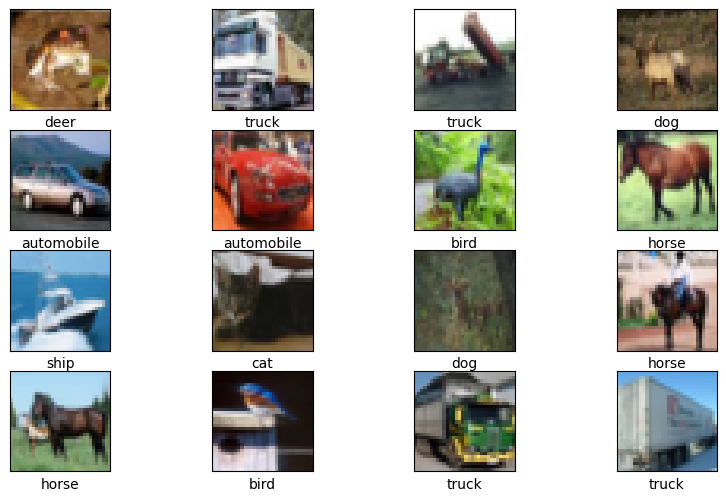

In [27]:
class_name = ['airplane', 'automobile','bird','cat', 'dog','frog', 'deer','horse','ship','truck']

plt.figure(figsize=(10,6))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
   # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
  plt.xlabel(class_name[y_train[i][0]])
plt.show()





🔨 Building Base Model 🔧

Model Architecture with Batch Normalization and Dropout
Explaination about Code
Convolutional Layer 1:

Filter size: 64 filters of size (4,4)


Activation: ReLU


Padding: Same


Input Shape: (32,32,3)
🖼️🔍 Conv2D: Extracts features using convolution.


🧼 Batch Normalization: Normalizes the activations of the previous layer.
Convolutional Layer 2:

Filter size: 64 filters of size (4,4)
Activation: ReLU

Padding: Same

🖼️🔍 Conv2D: Extracts more features.

🧼 Batch Normalization: Normalizes the activations.
Max Pooling Layer:

Pool size: (2,2)
🌊 MaxPooling2D: Reduces spatial dimensions.\\
Dropout Layer:

Dropout Rate: 0.2
🚫 Dropout: Reduces overfitting by randomly dropping neurons.
Convolutional Layer 3:

Filter size: 128 filters of size (4,4)
Activation: ReLU
Padding: Same
🖼️🔍 Conv2D: Extracts more features.
🧼 Batch Normalization: Normalizes the activations.
Convolutional Layer 4:

Filter size: 128 filters of size (4,4)
Activation: ReLU
Padding: Same
🖼️🔍 Conv2D: Extracts more features.


🧼 Batch Normalization: Normalizes the activations.


Max Pooling Layer:

Pool size: (2,2)


🌊 MaxPooling2D: Further reduces spatial dimensions.


Dropout Layer:

Dropout Rate: 0.25


🚫 Dropout: Further reduces overfitting.


Convolutional Layer 5:



Filter size: 128 filters of size (4,4)


Activation: ReLU


Padding: Same


🖼️🔍 Conv2D: Extracts more features.


🧼 Batch Normalization: Normalizes the activations.
Convolutional Layer 6:

Filter size: 128 filters of size (4,4)
Activation: ReLU

Padding: Same

🖼️🔍 Conv2D: Extracts more features.

🧼 Batch Normalization: Normalizes the activations.

Max Pooling Layer:


Pool size: (2,2)
🌊 MaxPooling2D: Further reduces spatial dimensions.
Dropout Layer:

Dropout Rate: 0.35

🚫 Dropout: Further reduces overfitting.

Flatten Layer: Flattens the output for input to dense layers.

Dense Layer 1:

Neurons: 256
Activation: ReLU

🧠 Dense (Fully Connected) layer: Processes flattened features.

---



🧼 Batch Normalization: Normalizes the activations.
Dropout Layer:

Dropout Rate: 0.5
🚫 Dropout: Further reduces overfitting.
Output Layer:

Neurons: 10 (for 10 classes)
Activation: Softmax
🎯 Dense (Output) layer: Produces class probabilities.

In [28]:
from tensorflow.keras.layers import BatchNormalization
# Model_3 with Batch Normalization

model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])# Model_3 with Batch Normalization
model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_50 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_51 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                      

# **Fitting**

# **How Early Stopping Works:**

The EarlyStopping callback you mentioned monitors the validation loss during training.


Validation loss is calculated on a separate set of data
(not used for training) to give an unbiased estimate of how well the model is generalizing.

***`monitor='val_loss':`***
 This tells Early Stopping to monitor the validation loss.


***`patience=10':`*** This sets the number of epochs to wait for improvement in validation loss before stopping training.


Here's what happens during training:

After each epoch, Early Stopping compares the current validation loss to the loss from previous epochs.


If the validation loss doesn't improve for patience consecutive epochs (in this case, 10), Early Stopping assumes the model is overfitting and stops training.


This allows you to use the model with the best validation loss achieved so far, which is typically before overfitting occurs.

Benefits of Early Stopping:

**Reduces Overfitting:** Stops training before the model memorizes specifics of the training data.

**Saves Time and Resources:** Avoids unnecessary training epochs.

**Improves Generalizability:** Leads to a model that performs better on unseen data.

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
#define early stopping callback
early_stoping = EarlyStopping(monitor= 'val_loss', patience= 10)

# Fit the model with early stopping
history = model.fit(x_train, y_train_en, epochs=100, \
                    verbose=1,validation_data=(x_test,y_test_en),callbacks=[early_stoping])




Epoch 1/100
1563/1563 [==============================] - 40s 23ms/step - loss: 1.5839 - accuracy: 0.4590 - val_loss: 1.1711 - val_accuracy: 0.5895
Epoch 2/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9405 - accuracy: 0.6723 - val_loss: 0.9132 - val_accuracy: 0.6793
Epoch 3/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7588 - accuracy: 0.7405 - val_loss: 0.7260 - val_accuracy: 0.7473
Epoch 4/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6452 - accuracy: 0.7803 - val_loss: 0.7605 - val_accuracy: 0.7444
Epoch 5/100
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5514 - accuracy: 0.8126 - val_loss: 0.5955 - val_accuracy: 0.7958
Epoch 6/100
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4877 - accuracy: 0.8349 - val_loss: 0.6826 - val_accuracy: 0.7751
Epoch 7/100
1563/1563 [==============================] - 41s 26ms/step - loss: 0.4264 - accuracy: 0.8552 - val_loss: 0

In [36]:
from tensorflow.keras.models import Sequential
evaluation = model.evaluate(x_test, y_test_en)
print('test accuracy of model (with batch Normalization : {}'.format(evaluation[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.5138 - accuracy: 0.8646
test accuracy of model (with batch Normalization : 0.8646000027656555


## **BOOM 86% accuracy¶**
# **Visulization of model layers**

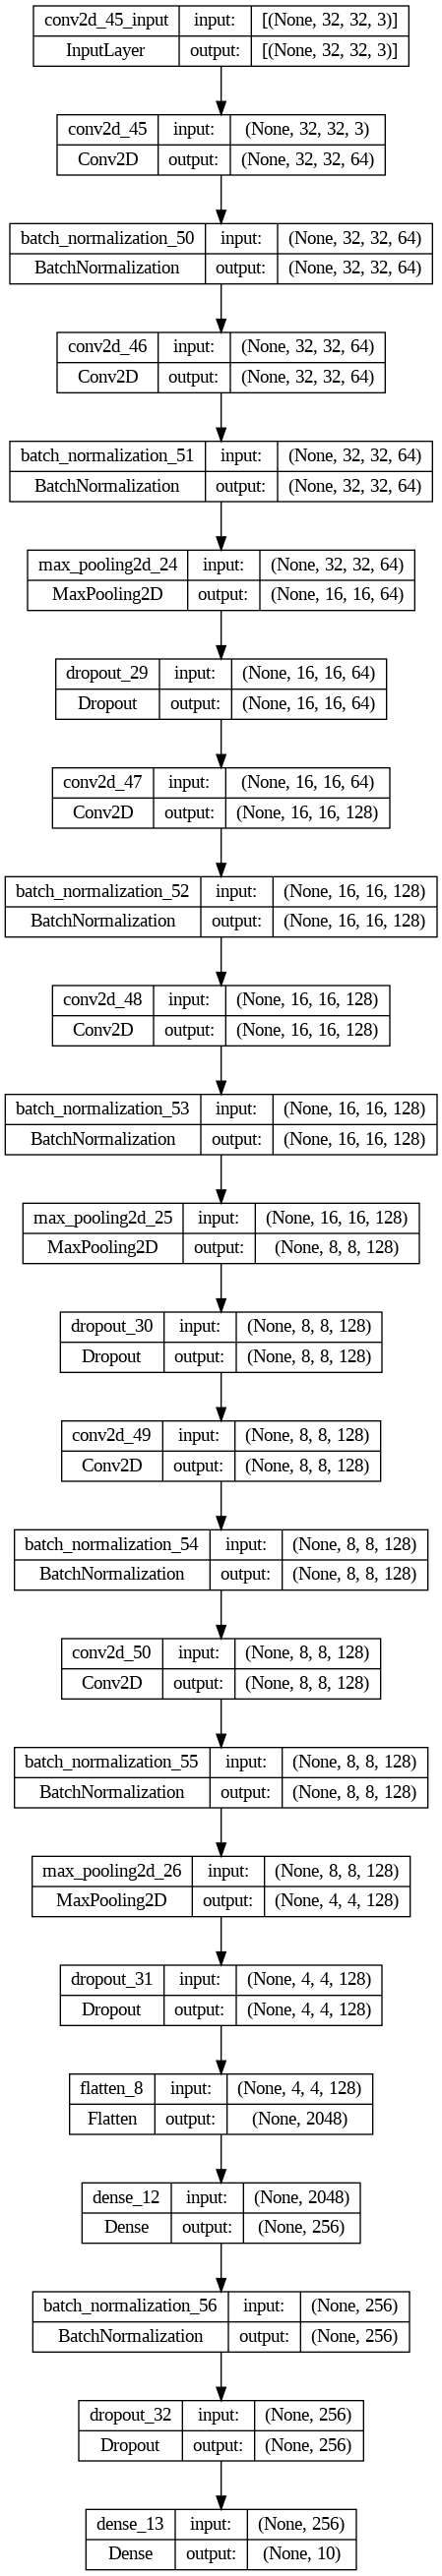

In [38]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names= True)

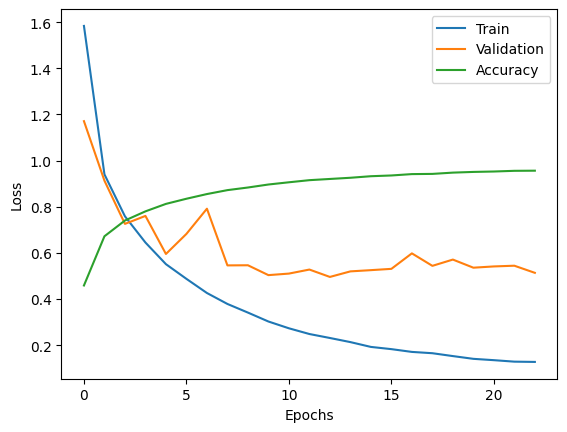

In [40]:
def plotloss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation','Accuracy'])
  plt.show()
plotloss(history)